# Praktijkvoorbeelden 28 mei

### Python Essentials 

The **Python Essentials** course offers a thorough introduction to Python programming, covering and practicing all the key features of the language. In fact, it encompasses more than what most professionals typically require for information management tasks.

The **hands-on practice** provided in Python Essentials lays a solid foundation, even for features not explicitly covered in the course. To build upon this, we are incorporating real-world practical examples in this online course to help you advance further and become a confident and capable Python user for business applications.

### Useful Python Tools for Business Applications

While the Python Essentials course is designed to be generic, it equips you with the skills necessary to explore additional tools relevant to business applications. Some of these tools include:

* **tabulate**: For outputting structured data in a readable table format.
* **pandas**: For managing and analyzing data efficiently.
* **matplotlib**: For creating a wide range of static, animated, and interactive charts.
* **requests**: For accessing server APIs using HTTP protocols.([pythoncharts.com][1])
* **others**: numpy, geopy, folium

These tools are not discussed in the Python Essentials course, but after completing the course, you will be well-prepared to delve into these areas and apply Python effectively in various business contexts.

[1]: https://www.pythoncharts.com/matplotlib/customizing-grid-matplotlib/?utm_source=chatgpt.com "Python Charts - Customizing the Grid in Matplotlib"


## Managing Tables & Spreadsheet Data Revisited

In [356]:
! dir *.xlsx

 Volume in drive C is Windows
 Volume Serial Number is 9E1E-8F54

 Directory of C:\Users\yroos\Python Scripts\Python Essentials

15/05/2025  18:47             5.862 brussels_weather_2020.xlsx
               1 File(s)          5.862 bytes
               0 Dir(s)  638.858.014.720 bytes free


In [364]:
# This version uses headers="keys" 
import pandas as pd
from tabulate import tabulate

# Step 1: Load the spreadsheet
filename = "brussels_weather_2020.xlsx"   # Adjust path if needed
df = pd.read_excel(filename)
# print(df)
# Step 2: Display the filtered results using headers="keys"
# The argument headers="keys" tells tabulate to use the column names (i.e., keys) from the DataFrame as the headers for the table
print(tabulate(df, headers="keys", tablefmt="pretty", showindex=True))

+----+-----------+----------+----------+------------+-------------+------------+
|    |   Month   | Max Temp | Min Temp | Sunny Days | Cloudy Days | Rainy Days |
+----+-----------+----------+----------+------------+-------------+------------+
| 0  |  January  |    10    |    -1    |     5      |     15      |     11     |
| 1  | February  |    12    |    0     |     6      |     12      |     11     |
| 2  |   March   |    15    |    2     |     8      |     14      |     9      |
| 3  |   April   |    18    |    5     |     12     |     10      |     8      |
| 4  |    May    |    22    |    9     |     14     |      9      |     8      |
| 5  |   June    |    25    |    13    |     15     |      8      |     7      |
| 6  |   July    |    28    |    15    |     18     |      7      |     6      |
| 7  |  August   |    27    |    14    |     17     |      8      |     6      |
| 8  | September |    23    |    11    |     13     |     10      |     7      |
| 9  |  October  |    17    

In [22]:
# Run previous code cell first
# Step 3: Filter the DataFrame directly
filtered_df = df[df["Rainy Days"] > 8]  # This creates a boolean mask (a list of True/False values) to select matching rows

# Step 4: Display the filtered results using headers="keys"
print(tabulate(filtered_df, headers="keys", tablefmt="pretty", showindex=True))

+----+----------+----------+----------+------------+-------------+------------+
|    |  Month   | Max Temp | Min Temp | Sunny Days | Cloudy Days | Rainy Days |
+----+----------+----------+----------+------------+-------------+------------+
| 0  | January  |    10    |    -1    |     5      |     15      |     11     |
| 1  | February |    12    |    0     |     6      |     12      |     11     |
| 2  |  March   |    15    |    2     |     8      |     14      |     9      |
| 11 | December |    7     |    0     |     4      |     18      |     9      |
+----+----------+----------+----------+------------+-------------+------------+


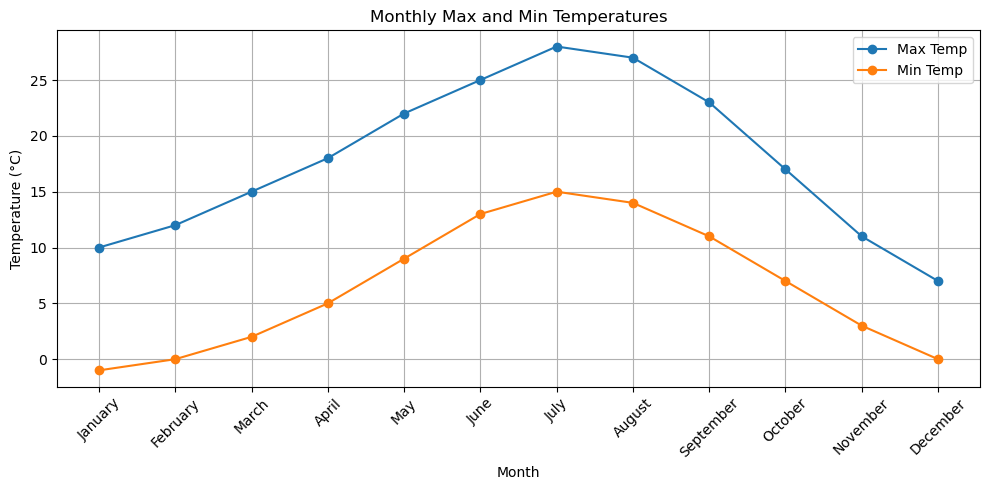

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "brussels_weather_2020.xlsx"  # Adjust path if needed
df = pd.read_excel(file_path)

# LINE GRAPH: Max and Min Temperatures per Month
plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['Max Temp'], marker='o', label='Max Temp')
plt.plot(df['Month'], df['Min Temp'], marker='o', label='Min Temp')
plt.title('Monthly Max and Min Temperatures')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

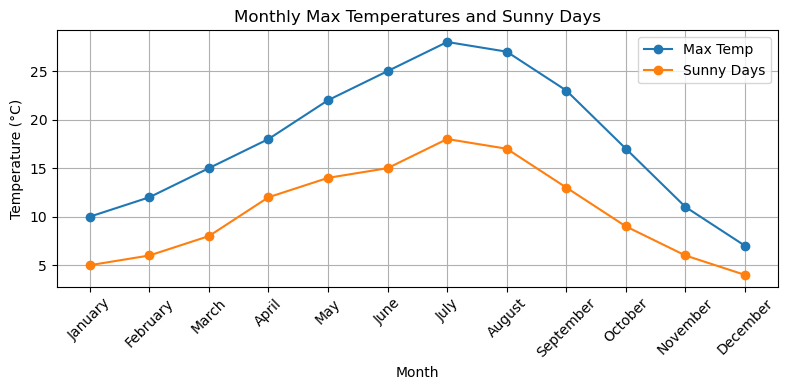

In [36]:
# LINE GRAPH: Max and Min Temperatures per Month
plt.figure(figsize=(8, 4))
plt.plot(df['Month'], df['Max Temp'], marker='o', label='Max Temp')
plt.plot(df['Month'], df['Sunny Days'], marker='o', label='Sunny Days')
plt.title('Monthly Max Temperatures and Sunny Days')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

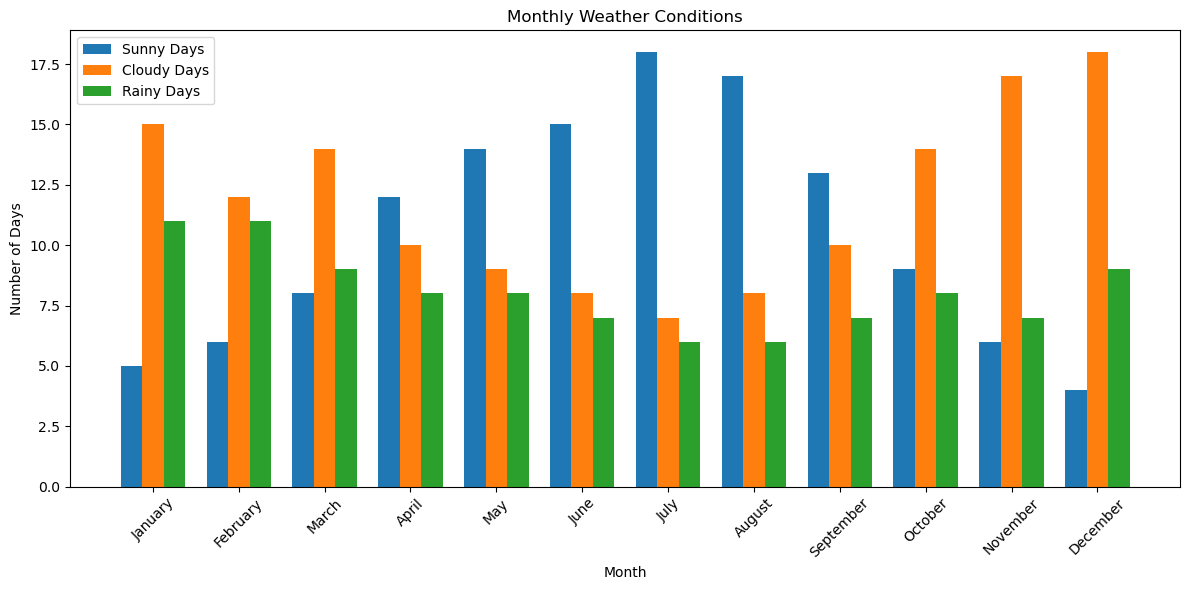

In [42]:
# BAR GRAPH: Sunny, Cloudy, and Rainy Days per Month
plt.figure(figsize=(12, 6))
bar_width = 0.25
# print(len(df['Month']))
x = range(len(df['Month']))
# print(x)
# Filtering dataframes on: Sunny, Cloudy and Rainy Days
plt.bar([i - bar_width for i in x], df['Sunny Days'], width=bar_width, label='Sunny Days')
plt.bar(x, df['Cloudy Days'], width=bar_width, label='Cloudy Days')
plt.bar([i + bar_width for i in x], df['Rainy Days'], width=bar_width, label='Rainy Days')

plt.title('Monthly Weather Conditions')
plt.xlabel('Month')
plt.ylabel('Number of Days')
plt.xticks(ticks=x, labels=df['Month'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

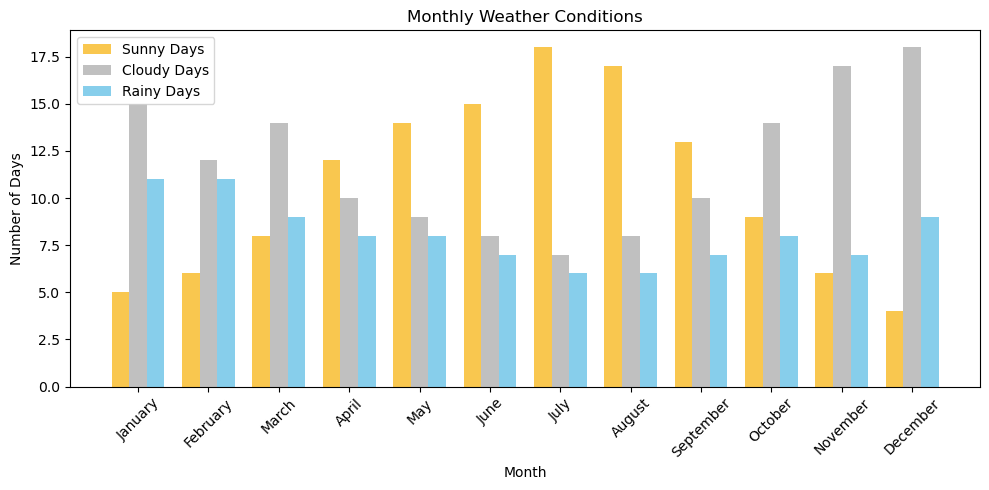

In [50]:
import matplotlib.pyplot as plt

# BAR GRAPH: Sunny, Cloudy, and Rainy Days per Month
plt.figure(figsize=(10, 5))
bar_width = 0.25
x = range(len(df['Month']))

# Define colors
sunny_color = '#f9c74f'   # yellow/gold
cloudy_color = 'silver'   # silver
rainy_color = '#87ceeb'   # bluesky 

# Plot bars with custom colors
plt.bar([i - bar_width for i in x], df['Sunny Days'], width=bar_width, label='Sunny Days', color=sunny_color)
plt.bar(x, df['Cloudy Days'], width=bar_width, label='Cloudy Days', color=cloudy_color)
plt.bar([i + bar_width for i in x], df['Rainy Days'], width=bar_width, label='Rainy Days', color=rainy_color)

plt.title('Monthly Weather Conditions')
plt.xlabel('Month')
plt.ylabel('Number of Days')
plt.xticks(ticks=x, labels=df['Month'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

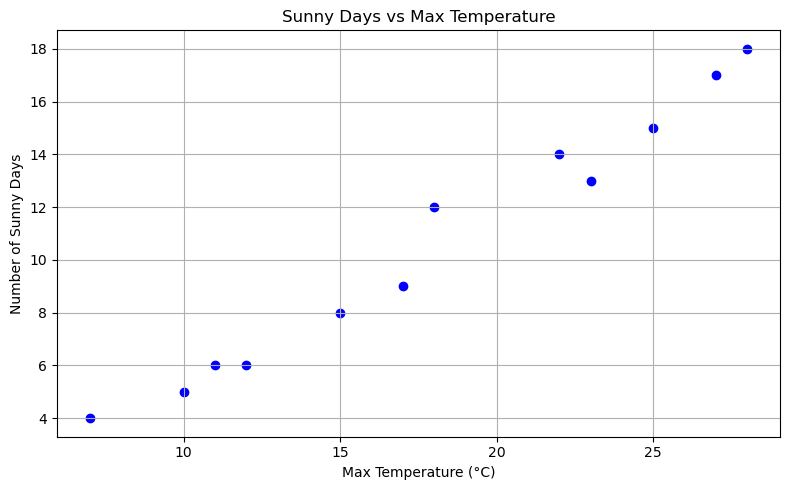

In [66]:
# SCATTER CHART: Max Temp vs Sunny Days
plt.figure(figsize=(8, 5))
plt.scatter(df['Max Temp'], df['Sunny Days'], color='blue')  # Filtering dataframe on Max Temp and Sunny Days
plt.title('Sunny Days vs Max Temperature')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Number of Sunny Days')
plt.grid(True)
plt.tight_layout()
plt.show()

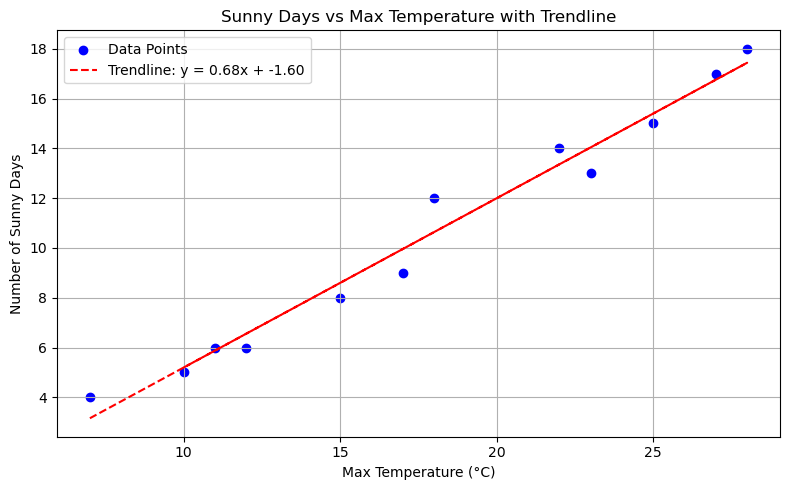

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = "brussels_weather_2020.xlsx"  # Adjust if needed
df = pd.read_excel(file_path)

# Scatter chart with trendline
plt.figure(figsize=(8, 5))
x = df['Max Temp']       # Filtering dataframe on Max Temp
y = df['Sunny Days']     # Filtering on Sunny Days

# Plot scatter points in blue
plt.scatter(x, y, color='blue', label='Data Points')

# Calculate and plot linear trendline (red dashed line)
z = np.polyfit(x, y, 1)  # Degree 1 for linear fit
p = np.poly1d(z)
plt.plot(x, p(x), "r--", label=f'Trendline: y = {z[0]:.2f}x + {z[1]:.2f}')

# Chart formatting
plt.title('Sunny Days vs Max Temperature with Trendline')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Number of Sunny Days')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [84]:
print(type(df))
mt = df['Max Temp']
print(type(mt))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


## Python Functions and Libraries Continued

You define a function with parameters. You call a function with arguments.

- Parameters live inside a function’s definition — they define what kind of input the function can take.
- Arguments live outside the function — they are the actual data you provide when calling the function, and they get assigned to the parameters.

In [97]:
def greet(name="Bernice"):          # ← 'name' is a parameter
    print("Hello", name)

greet("Alice")            # ← "Alice" is an argument
greet("Prachand")            # ← "Alice" is an argument
greet()


Hello Alice
Hello Prachand
Hello Bernice


In [133]:
def add_numbers(a=1, b=2, c=3):
    print("Output: ",a + b + c)
 
add_numbers(100,1)


Output:  104


## Return Values

In [149]:
def hi(how_many = 1, separator = "-"):
    for printout in range(how_many):
        print("hi", sep=separator)


In [185]:
def hi(how_many = 1, separator = "-"):
    output = "" # not None
    for printout in range(how_many):
        # print(output)
        output = output + "hi" + separator
    return output



In [187]:
print(hi(10))

hi-hi-hi-hi-hi-hi-hi-hi-hi-hi-


In [212]:
from datetime import datetime

def days_between_dates(date1_str, date2_str, date_format="%Y-%m-%d"):
    """
    Returns the number of days between two dates.
    
    Args:
        date1_str: First date as a string (e.g., "2025-05-01")
        date2_str: Second date as a string (e.g., "2025-05-27")
        date_format: Optional date format string (default: "YYYY-MM-DD")
        The order of the arguments does not matter because you are using abs() to return the absolute difference
    """
    d1 = datetime.strptime(date1_str, date_format)
    d2 = datetime.strptime(date2_str, date_format)
    return abs((d2 - d1).days)


In [214]:
days_between_dates("2025-05-28", "2025-01-01")

147

In [210]:
days_between_dates("2025-01-01", "2025-05-28")

147

In [216]:
from datetime import datetime

def months_between(date1_str, date2_str, date_format="%Y-%m-%d"):
    """
    Returns the number of full months between two dates.
    
    Args:
        date1_str: First date as a string (e.g., "2025-01-15")
        date2_str: Second date as a string (e.g., "2025-05-27")
        date_format: Format of the input dates (default: "%Y-%m-%d")
        
    Returns:
        Number of full months (integer)
    """
    d1 = datetime.strptime(date1_str, date_format)
    d2 = datetime.strptime(date2_str, date_format)

    # Ensure d1 is before d2
    if d1 > d2:
        d1, d2 = d2, d1

    # Calculate year and month difference
    year_diff = d2.year - d1.year
    month_diff = d2.month - d1.month

    total_months = year_diff * 12 + month_diff

    # Adjust if the end day is before the start day
    if d2.day < d1.day:
        total_months -= 1

    return total_months

In [232]:
months_between("2026-1-1", "2025-1-1")

12

In [242]:
d1 = 200
d2 = 100
if d1 > d2:
    d1, d2 = d2, d1
print(d1)
print(d2)

100
200


In [256]:
d1 = "Gilbert"
d2 = "Albert"
print(d1)
print(d2)
if d1 > d2:
    d1, d2 = d2, d1
print(d1)
print(d2)

Gilbert
Albert
Albert
Gilbert


In [268]:
def get_file_extension(filename):
    """Returns the extension of a filename (e.g. 'txt' or 'jpg')."""
    parts = filename.rsplit('.', 1)
    # print(parts)
    return parts[1] if len(parts) == 2 else ''

In [266]:
print(get_file_extension("document.pdf"))     # Output: pdf
print(get_file_extension("archive.tar.gz"))   # Output: gz
print(get_file_extension("extension.ext"))     # Output: (empty string)

pdf
tar.gz
ext


In [328]:
# Example company hierarchy
# "team": a list of names of people they manage directly
employees_dict = {
    "Alice": {"salary": 50000, "team": ["Bob", "Carol"]},
    "Bob": {"salary": 40000, "team": ["Dave"]},
    "Carol": {"salary": 30000, "team": ["Dinky"]},
    "Ricardo" : {"salary": 45000, "team": []},
    "Dave": {"salary": 25000, "team": []},
    "Dinky": {"salary": 20000, "team": []}
}

In [292]:
print(employees_dict)

{'Alice': {'salary': 50000, 'team': ['Bob', 'Carol']}, 'Bob': {'salary': 40000, 'team': ['Dave']}, 'Carol': {'salary': 30000, 'team': ['Dinky']}, 'Dave': {'salary': 25000, 'team': []}, 'Dinky': {'salary': 20000, 'team': []}}


In [326]:
employees_str = """
{
    "Alice": {"salary": 50000, "team": ["Bob", "Carol"]},
    "Bob": {"salary": 40000, "team": ["Dave"]},
    "Carol": {"salary": 30000, "team": ["Dinky"]},
    "Ricardo" : {"salary": 45000, "team": []},
    "Dave": {"salary": 25000, "team": []},
    "Dinky": {"salary": 20000, "team": []}
}
"""

In [336]:
print(employees_str)


{
    "Alice": {"salary": 50000, "team": ["Bob", "Carol"]},
    "Bob": {"salary": 40000, "team": ["Dave"]},
    "Carol": {"salary": 30000, "team": ["Dinky"]},
    "Ricardo" : {"salary": 45000, "team": []},
    "Dave": {"salary": 25000, "team": []},
    "Dinky": {"salary": 20000, "team": []}
}



In [350]:
# Run previous cell first
def total_salary(name):
    """
    Recursively calculate the total salary for an employee and their full team.
    Includes all indirect reports down the hierarchy.
    """
    employee = employees_dict[name]
    total = employee["salary"]
    for teammate in employee["team"]:
        # total += total_salary(teammate)  # Recursive call
        total = total + total_salary(teammate)  # Recursive call
    return total

In [352]:
print(f"Total salary cost for Alice's team: {total_salary('Alice')} Euro")

Total salary cost for Alice's team: 165000 Euro


In [354]:
team_lead = 'Ricardo'
print(f"Total salary cost for {team_lead}'s team: {total_salary(team_lead)} Euro")


Total salary cost for Ricardo's team: 45000 Euro
